<a href="https://colab.research.google.com/github/Wojciech512/algorytm-wieloklasowy-przewidywanie-preferencji-cieplnych-u-ytkownika/blob/main/PBL_algorytm_wieloklasowy%2C_przewidywanie_preferencji_cieplnych_u%C5%BCytkownika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importowanie pliku csv
from google.colab import drive
drive.mount('/content/drive')
#tworzenie dataframe'a z pliku csv
import pandas as pd
path="/content/drive/MyDrive/datapbl.csv"
df=pd.read_csv(path, sep=";")
df_raw=pd.DataFrame(data=df)
df_raw

Mounted at /content/drive


,Data,RH,TA,TSK,ID,TS,A_TS,PF_TS,A_AM,PF_AM,...,MS,SK,KR,D,MSD,MLA,MDA,MBA,KZA,PS
0,44194.33361,46.4,20.0,36.162,1,0,0,0.0,0,0,...,360.0,2303,9366,7.69,676,165,8,30,896,49.0
1,44194.50028,43.7,21.0,32.168,1,0,0,0.0,0,-1,...,NaN,2303,9366,7.69,676,165,8,30,896,88.0
2,44194.66694,46.5,20.8,31.232,1,0,0,0.0,0,0,...,NaN,2303,9366,7.69,676,165,8,30,896,70.0
3,44194.83361,43.7,21.1,35.413,1,0,0,0.0,0,-1,...,NaN,2303,9366,7.69,676,165,8,30,896,62.0
4,44195.33361,48.0,19.8,35.101,1,0,0,0.0,0,0,...,411.0,2329,7616,5.87,437,285,0,0,1005,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,44387.83451,61.5,22.9,33.940,2,0,0,0.0,1,0,...,NaN,3772,21677,16.22,400,399,38,87,2565,63.0
860,44388.33451,58.1,24.0,32.505,2,1,0,0.0,1,0,...,282.0,3131,11513,8.63,703,320,75,2,1798,102.0
861,44388.50118,63.3,25.0,34.065,2,2,0,-1.0,0,1,...,NaN,3131,11513,8.63,703,320,75,2,1798,63.0
862,44388.66785,62.5,24.9,32.942,2,1,1,0.0,1,0,...,NaN,3131,11513,8.63,703,320,75,2,1798,69.0


In [ ]:
#Opis danych
# Badania długotrwałe 2 osób okres 2,5 miesiąca, od końca grudnia 2020 do połowy marca 2021

# RH	wilgotność względna (relative humidity), pomiary ciągłe
# TA	temperatura powietrza (air temperature), pomiary ciągłe
# TSK	temperatura skóry (skin temperature), pomiary ciągłe
# ID	numer identyfikacyjny
# 	1: kobieta, 59 lat, 165 cm, brak wagi
# 	2: mężczyzna, 59 lat, 180 cm, brak wagi
# TS	odczucia cieplne (thermal sensation)
# 	-3 – zimno (cold)
# 	-2 – chłodno (cool)
# 	-1 – dość chłodno (slightly cool)
# 	0 – neutralnie (neutral)
# 	+1 – dość ciepło (slightly warm)
# 	+2 – ciepło (warm)
# 	+3 – gorąco (hot)
# A_TS	akceptowalność odczuć cieplnych (thermal sensation acceptability)
# 	-2 – bardzo nieakceptowalne (very unacceptable)
# 	-1 – dość nieakceptowalne (slightly unacceptable)
# 	0 – neutralne (neutral)
# 	+1 – dość akceptowalne (slightly acceptable)
# 	+2 – bardzo akceptowalne (very acceptable)
#  PS	puls

In [ ]:
#usuwanie zbędnych kolumn df_raw i analiza zawartości
df_main=df_raw.copy() 
#https://bulldogjob.pl/readme/8-sposobow-na-przeksztalcenie-dataframe-w-pandas-przyklady
df_main.drop(["A_TS","Data","PF_TS","A_AM","PF_AM","F_S","F_C","F_P","CP","MS","SK","KR","D","MSD","MLA","MDA","MBA","KZA"],axis=1,inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RH      864 non-null    float64
 1   TA      864 non-null    float64
 2   TSK     864 non-null    float64
 3   ID      864 non-null    int64  
 4   TS      864 non-null    int64  
 5   PS      835 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 40.6 KB


In [ ]:
#zamiana wartości NaN w df_main na mediane PS
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
imputer.fit_transform(df_main[['PS']])
df_main['PS']=imputer.transform(df_main[['PS']])
print(f"median value: {imputer.statistics_}")
df_main

median value: [74.]


,RH,TA,TSK,ID,TS,PS
0,46.4,20.0,36.162,1,0,49.0
1,43.7,21.0,32.168,1,0,88.0
2,46.5,20.8,31.232,1,0,70.0
3,43.7,21.1,35.413,1,0,62.0
4,48.0,19.8,35.101,1,0,76.0
...,...,...,...,...,...,...
859,61.5,22.9,33.940,2,0,63.0
860,58.1,24.0,32.505,2,1,102.0
861,63.3,25.0,34.065,2,2,63.0
862,62.5,24.9,32.942,2,1,69.0


In [ ]:
#potwierdzenie niwelacji nan w df_main
df_main_sum_form_isnull=df_main.isnull().sum()
# ile % to brak danych
df_main_mean_form_isnull=df_main.isnull().sum()/len(df_main)

print(f"sum:\n{df_main_sum_form_isnull}")
print("================")
print(f"mean:\n{df_main_mean_form_isnull}")

sum:
RH     0
TA     0
TSK    0
ID     0
TS     0
PS     0
dtype: int64
mean:
RH     0.0
TA     0.0
TSK    0.0
ID     0.0
TS     0.0
PS     0.0
dtype: float64


In [ ]:
#standaryzacja danych [["RH",	"TA",	"TSK","PS"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df_main[["RH","TA",	"TSK","PS"]]=scaler.fit_transform(df_main[["RH","TA",	"TSK","PS"]])

#df_main, tworzenie zbiorów testowych i uczących
df_main_learn=df_main.loc["0":"800"] 
df_main_test=df_main.loc["801":]
#sprawdzenie czy dane się zgadzają
print(df_main.head())
print(df_main_learn.head())

print(df_main_test.head())
print(df_main_test)

         RH        TA       TSK  ID  TS        PS
0  0.230386 -0.350084  1.713382   1   0 -2.248624
1 -0.045227 -0.024179 -0.419126   1   0  0.927235
2  0.240594 -0.089360 -0.918883   1   0 -0.538546
3 -0.045227  0.008412  1.313470   1   0 -1.190004
4  0.393712 -0.415265  1.146885   1   0 -0.049953
         RH        TA       TSK  ID  TS        PS
0  0.230386 -0.350084  1.713382   1   0 -2.248624
1 -0.045227 -0.024179 -0.419126   1   0  0.927235
2  0.240594 -0.089360 -0.918883   1   0 -0.538546
3 -0.045227  0.008412  1.313470   1   0 -1.190004
4  0.393712 -0.415265  1.146885   1   0 -0.049953
           RH        TA       TSK  ID  TS        PS
801  1.516577  0.953536 -0.072607   2   1  1.415828
802  1.271588  1.018717  0.160720   2   2  1.008667
803  1.751358  0.953536 -0.972809   2   1 -0.457114
804  1.781982  0.920946  1.127129   2   2 -0.701411
805  1.169510  1.214260  0.093979   2   2 -0.701411
           RH        TA       TSK  ID  TS        PS
801  1.516577  0.953536 -0.072607   

In [ ]:
#tworzenie tabeli wyników learn i test (jeżeli wyjdzie error to dlatego że po pierwszym uruchomieniu już TS nie ma w tabeli ale wszystko działa)
df_main_learn_target=df_main_learn.pop("TS")
df_main_test_target=df_main_test.pop('TS')
print(df_main_learn_target)
print(df_main_test_target)
#określenie klas klasyfikatora
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# df_main_learn['TS']= encoder.fit_transform(df_main_learn_target)
encoder.fit_transform(df_main_learn_target)
print(encoder.classes_)
print(df_main_learn)

0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    0
798    2
799    1
800    0
Name: TS, Length: 801, dtype: int64
801    1
802    2
803    1
804    2
805    2
      ..
859    0
860    1
861    2
862    1
863    0
Name: TS, Length: 63, dtype: int64
[-2 -1  0  1  2  3]
           RH        TA       TSK  ID        PS
0    0.230386 -0.350084  1.713382   1 -2.248624
1   -0.045227 -0.024179 -0.419126   1  0.927235
2    0.240594 -0.089360 -0.918883   1 -0.538546
3   -0.045227  0.008412  1.313470   1 -1.190004
4    0.393712 -0.415265  1.146885   1 -0.049953
..        ...       ...       ...  ..       ...
796  2.220920  0.920946 -0.506156   2 -0.782843
797  1.761566  1.214260  0.793958   2 -1.352869
798  1.700319  1.116489 -2.206717   2  0.275776
799  1.996347  0.497269 -0.206089   2 -0.782843
800  1.751358  1.116489 -0.072607   2  1.252964

[801 rows x 5 columns]


In [ ]:
#uczenie 
from sklearn.ensemble import RandomForestClassifier
model_RandomForestClassifier = RandomForestClassifier()
model_RandomForestClassifier.fit(df_main_learn, df_main_learn_target)
#model_RandomForestClassifier.fit(df_main_test_target,df_main_test_target)

#testowanie
model_RandomForestClassifier_test=model_RandomForestClassifier.score(df_main_test,df_main_test_target)
print(model_RandomForestClassifier_test)





0.3333333333333333



# Dane są prawdopodobnie dobrze obrobione jednak możliwe że problem niskiej dokładności leży właśnie w uczeniu na kobiety/mężczyźni a testowanie na zbiorze samych kobiet

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


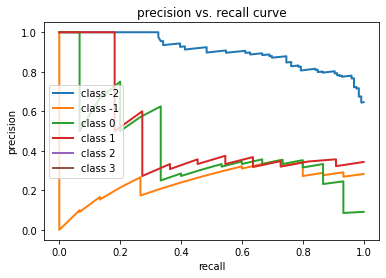

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

n_classes=len(set(df_main_learn_target))
Y=label_binarize(df_main_learn_target, classes=[*range(n_classes)])

#https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431
X_train, X_test, y_train, y_test = train_test_split(df_main_learn,Y, random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=50,max_depth=3,random_state=0))

clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_score[:, i])
    #sprawdzić czy legenda zgadza się z przedstawionymi danymu
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(encoder.classes_[i])) 
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


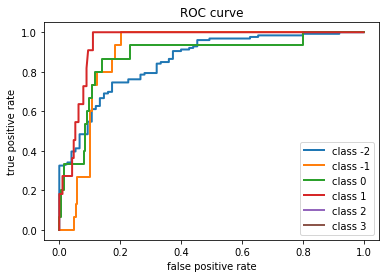

In [ ]:
#roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(encoder.classes_[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

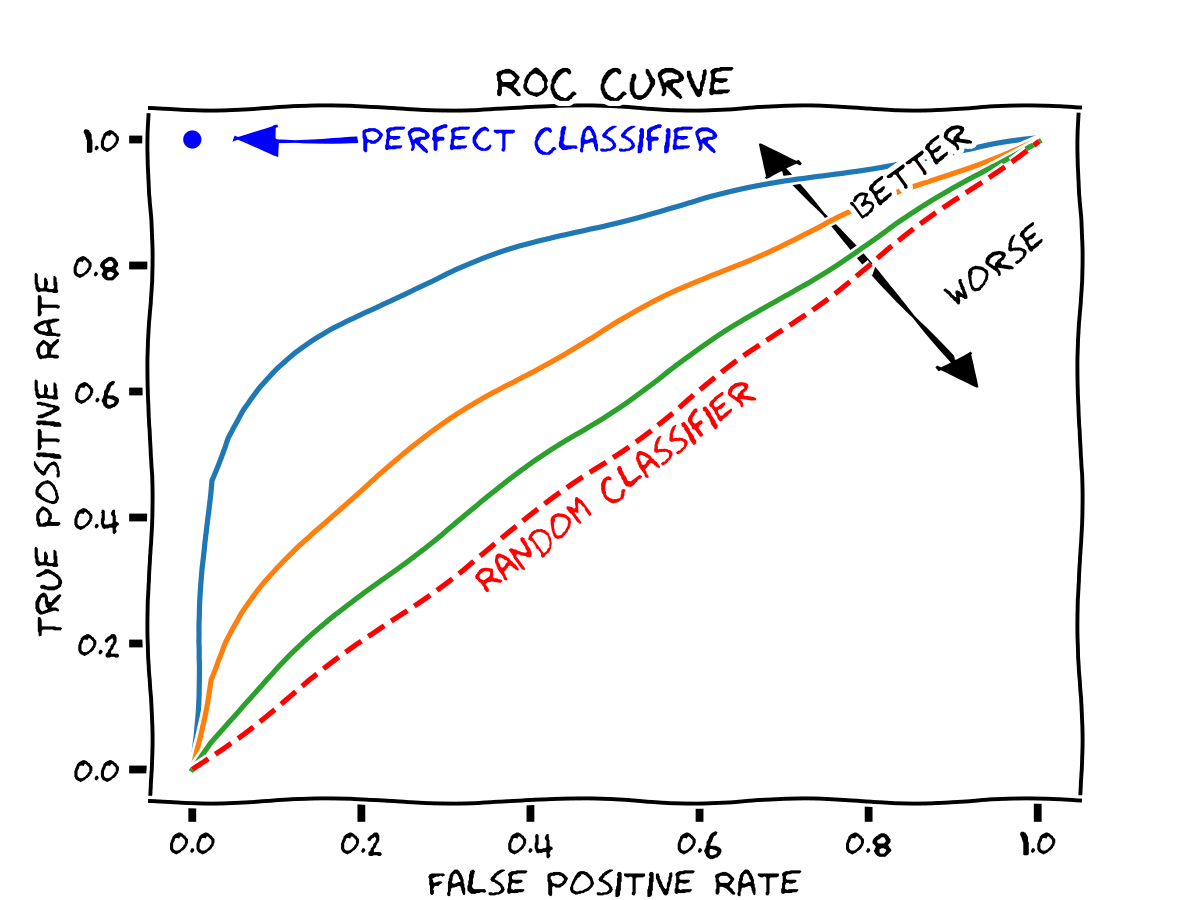

In [ ]:
#konwenter #for i in "max y score"==1  y test zostawiamy
#https://stackoverflow.com/questions/42636765/how-to-set-all-the-values-of-an-existing-pandas-dataframe-to-zero
#https://www.easytweaks.com/replace-zero-values-pandas-dataframe/

# 1.przejdź po każdym rzędzie
# 2.porównaj indeks każdego z elementów w rzędzie do indeksu maksymalnej wartości w kolumnie
# 3.nadpisz wartość we właściwym indeksie wartością 1

max_Var_df=pd.DataFrame(y_score)
max_Var=max_Var_df.max(axis=1)
max_Var_Index=max_Var_df.idxmax(axis=1)
maxVar_df_copy=max_Var_df.copy()
#zerowanie maxVar_df_copy
for col in maxVar_df_copy.columns:
    maxVar_df_copy[col].values[:] = 0

#wpisywanie 1
counter=0
for i in maxVar_df_copy.index:
  maxVar_df_copy[max_Var_Index[counter]][i]=1
  counter+=1

print(max_Var_df.head()) #przewidziane zmienne przez algorytm w postaci % dla każdej klasy
print(max_Var.head())
#porównanie czy konwenter działa dobrze
print(max_Var_Index)
print(maxVar_df_copy) #przewidziane zmienne przez algorytm w postaci binarnej

          0         1         2         3    4    5
0  0.676912  0.030715  0.050087  0.002992  0.0  0.0
1  0.777739  0.004715  0.006887  0.000227  0.0  0.0
2  0.728920  0.009859  0.059308  0.000625  0.0  0.0
3  0.529395  0.043673  0.130634  0.003554  0.0  0.0
4  0.670089  0.054649  0.107755  0.025864  0.0  0.0
0    0.676912
1    0.777739
2    0.728920
3    0.529395
4    0.670089
dtype: float64
0      0
1      0
2      0
3      0
4      0
      ..
196    0
197    0
198    0
199    0
200    0
Length: 201, dtype: int64
       0    1    2    3    4    5
0    1.0  0.0  0.0  0.0  0.0  0.0
1    1.0  0.0  0.0  0.0  0.0  0.0
2    1.0  0.0  0.0  0.0  0.0  0.0
3    1.0  0.0  0.0  0.0  0.0  0.0
4    1.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...
196  1.0  0.0  0.0  0.0  0.0  0.0
197  1.0  0.0  0.0  0.0  0.0  0.0
198  1.0  0.0  0.0  0.0  0.0  0.0
199  1.0  0.0  0.0  0.0  0.0  0.0
200  1.0  0.0  0.0  0.0  0.0  0.0

[201 rows x 6 columns]


In [ ]:
#macierz pomyłek
#sklearn.metrics.confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,maxVar_df_copy) 

array([[[ 31,  44],
        [  4, 122]],

       [[186,   0],
        [ 15,   0]],

       [[163,  23],
        [  3,  12]],

       [[190,   0],
        [ 11,   0]],

       [[201,   0],
        [  0,   0]],

       [[201,   0],
        [  0,   0]]])

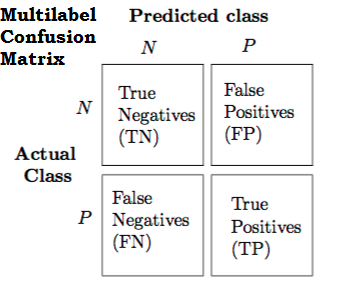

#Jak przedstawić macierz pomyłek graficznie?